<a href="https://colab.research.google.com/github/zzhining/deeplearing_basic/blob/main/tf_exercise_minist_classifier_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic 신경망

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Q1.

2D 이미지를 1D 형태로 변환하여 입력하려고 합니다. 그리고 0 ~ 1 사이의 값을 갖도록 스케일을 조절하려고 합니다.

X_train과 X_test 값을 올바르게 설정하세요. 


 (Tip)
  reshape, astype 사용


In [ ]:
X_train.shape[1] * X_train.shape[2]

784

In [ ]:
# X_train = # 작성하세요
# X_test = # 작성하세요

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255


In [ ]:
X_train.shape

(60000, 784)

### Q2.
Y_train과 Y_test를 원핫인코딩을 사용하여 설정하세요.
 (Tip)
  to_categorical()

In [ ]:
# Y_train = # 작성하세요
# Y_test = # 작성하세요
Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

### Q3.
하나의 은닉층(노드 수는 512개)을 갖는 인공신경망을 설계하세요.
 (Tip)
  model.add()
  Dense() 

In [ ]:
# 모델 프레임 설정
model = Sequential()
# 작성하세요
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Q4. 
모델 실행 환경을 설정하세요.
 (TIp) model.compile()

In [ ]:
# 작성하세요
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### Q5.
모델 학습을 수행하세요. 
- 검증용 데이터는 Validation 데이터로 설정
- epochs 은 30, batch_size는 200, callback 설정

In [ ]:
# 모델의 실행
# history = model.fit(# 작성하세요)

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, 
                    callbacks=[early_stopping_callback,checkpointer])

Epoch 1/30
294/300 [============================>.] - ETA: 0s - loss: 0.3049 - accuracy: 0.9142
Epoch 1: val_loss improved from inf to 0.14736, saving model to ./model/01-0.1474.hdf5
300/300 [==============================] - 5s 5ms/step - loss: 0.3028 - accuracy: 0.9149 - val_loss: 0.1474 - val_accuracy: 0.9572
Epoch 2/30
288/300 [===========================>..] - ETA: 0s - loss: 0.1252 - accuracy: 0.9630
Epoch 2: val_loss improved from 0.14736 to 0.10193, saving model to ./model/02-0.1019.hdf5
300/300 [==============================] - 1s 3ms/step - loss: 0.1236 - accuracy: 0.9635 - val_loss: 0.1019 - val_accuracy: 0.9686
Epoch 3/30
296/300 [============================>.] - ETA: 0s - loss: 0.0810 - accuracy: 0.9768
Epoch 3: val_loss improved from 0.10193 to 0.08914, saving model to ./model/03-0.0891.hdf5
300/300 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.9768 - val_loss: 0.0891 - val_accuracy: 0.9720
Epoch 4/30
282/300 [===========================>..

### Q6.
테스트 셋을 사용하여 모델 평가를 진행하세요.


 (Tip)
  model.evaluate()

In [ ]:
# 작성하세요
model.evaluate(X_test, Y_test)#[1]

ValueError: ignored

# CNN

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Q7. 

CNN 학습을 위해 2차원 입력데이터를 설정하고 [0,1] 범위를 갖도록 스케일링을 수행하세요

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# X_train = # 작성하세요
# X_test = # 작성하세요
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

### Q8.
CNN 학습을 위해 출력 데이터를 설정하고, 원핫인코딩을 수행하세요.

In [ ]:
# Y_train = # 작성하세요
# Y_test = # 작성하세요
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

### Q9.
다음과 같이 CNN을 설계하세요.

|       | Stage1           | Stage1 | Stage2           | Stage2 | Stage3    | Stage4      |
| ----- | ---------------- | ------ | ---------------- | ------ | --------- | ----------- |
| Layer | Conv             | Pool   | Conv             | Pool   | FC        | Output      |
|       | (5,20)/1,0, RELU | 2/2,0  | (5,50)/1,0, RELU | 2/2,0  | 500, ReLU | 10, softmax |


(5,20)/1,0
- 5: kernel size
- 20: kernel 개수
- 1:  stride
- 0 : padding

In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
# Stage1
model.add(Conv2D(20, kernel_size=(5, 5), strides=(1, 1),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides= (2, 2)))
# Stage2
model.add(Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides= (2, 2)))
# Stage3
model.add(Flatten())
model.add(Dense(500,  activation='relu'))
# Stage4
model.add(Dense(10, activation='softmax'))

### Q10. 
모델 실행 환경을 설정하세요.
 (TIp) model.compile()

In [ ]:
# 작성하세요
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Epoch 1: val_loss improved from inf to 0.05427, saving model to ./model/01-0.0543.hdf5

Epoch 2: val_loss improved from 0.05427 to 0.03596, saving model to ./model/02-0.0360.hdf5

Epoch 3: val_loss did not improve from 0.03596

Epoch 4: val_loss improved from 0.03596 to 0.03256, saving model to ./model/04-0.0326.hdf5

Epoch 5: val_loss improved from 0.03256 to 0.03142, saving model to ./model/05-0.0314.hdf5

Epoch 6: val_loss improved from 0.03142 to 0.02786, saving model to ./model/06-0.0279.hdf5

Epoch 7: val_loss did not improve from 0.02786

Epoch 8: val_loss did not improve from 0.02786

Epoch 9: val_loss improved from 0.02786 to 0.02728, saving model to ./model/09-0.0273.hdf5

Epoch 10: val_loss did not improve from 0.02728

Epoch 11: val_loss did not improve from 0.02728

Epoch 12: val_loss did not improve from 0.02728

Epoch 13: val_loss did not improve from 0.02728

Epoch 14: val_loss did not improve from 0.02728

Epoch 15: val_loss did not improve from 0.02728

Epoch 16: val

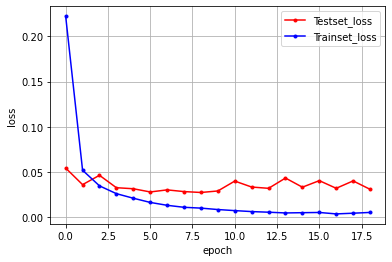

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, \
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()